In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
names = []
embeddings = []

In [3]:
with open("../multimodal-batik-ir/1. pre-processing/text/text_embeddings_output.json", "r") as f:
    for line in f:
        data = json.loads(line)
        names.append(data["Nama"])
        embeddings.append(data["nama_embedding"])

In [4]:
embeddings = np.array(embeddings)

In [ ]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

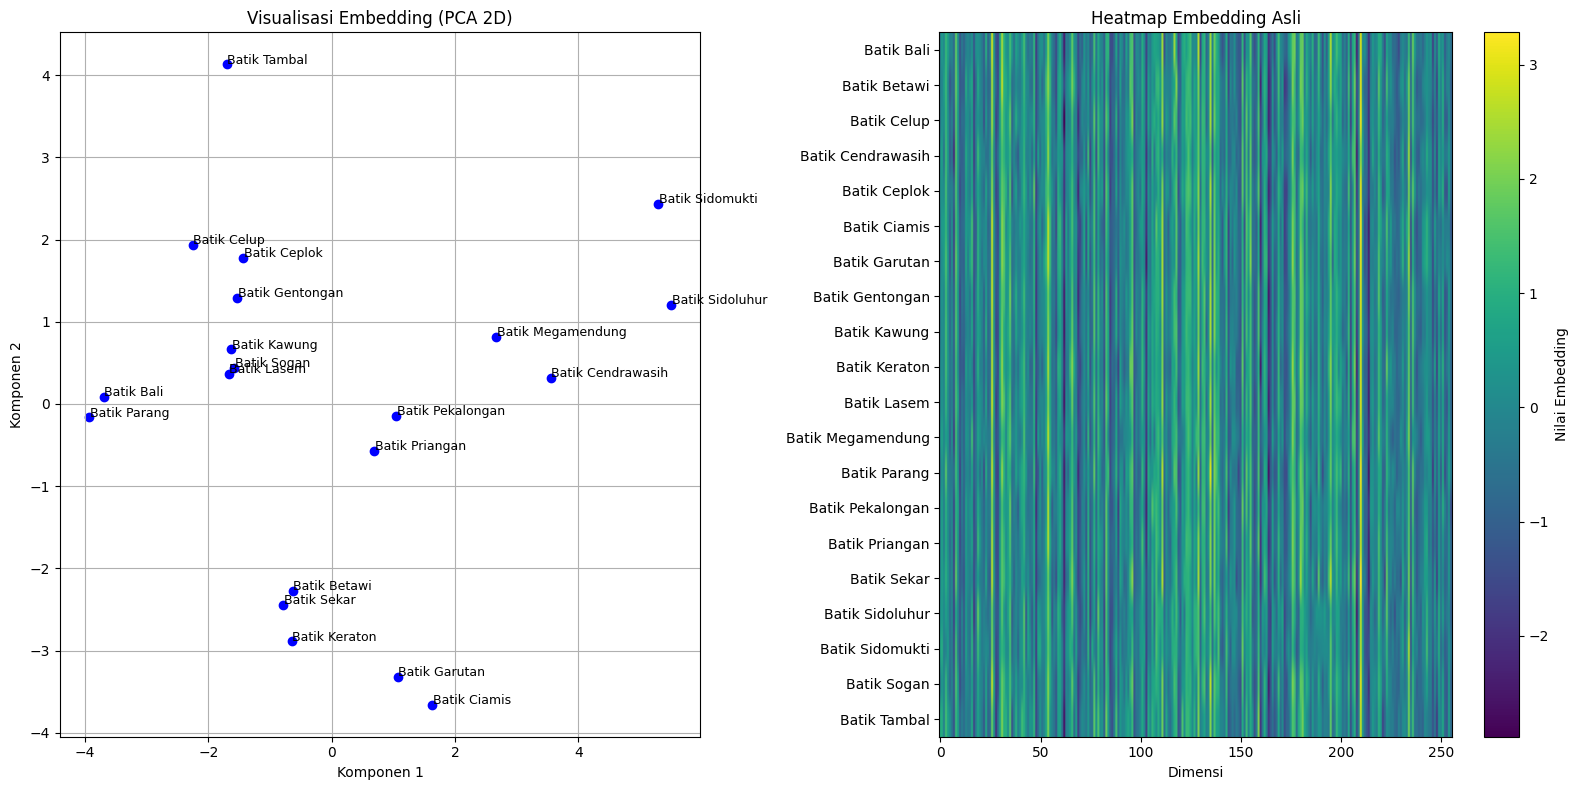

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Scatter plot hasil PCA
axes[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue')
for i, (x, y) in enumerate(embeddings_2d):
    axes[0].text(x + 0.01, y + 0.01, names[i], fontsize=9)
axes[0].set_title("Visualisasi Embedding (PCA 2D)")
axes[0].set_xlabel("Komponen 1")
axes[0].set_ylabel("Komponen 2")
axes[0].grid(True)

# Plot 2: Heatmap dari embedding asli (tanpa reduksi)
heatmap = axes[1].imshow(embeddings, aspect='auto', cmap='viridis')
axes[1].set_title("Heatmap Embedding Asli")
axes[1].set_xlabel("Dimensi")
axes[1].set_yticks(range(len(names)))
axes[1].set_yticklabels(names)
fig.colorbar(heatmap, ax=axes[1], label="Nilai Embedding")

plt.tight_layout()
plt.show()